In [1]:
import pandas as pd

# Replace 'your_file.csv' with the actual path to your CSV file
file_path = 'data/CO2emissions.csv'

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Now, 'df' contains your data from the CSV file
display(df)

# number of years in dataframe
unique_years = len(df['Year'].unique())
print(f"Total of unique years: {unique_years}, Period: {min(df['Year'].unique())} - {max(df['Year'].unique())}" )

# number of countries (including Global)
unique_countries = len(df['ISO 3166-1 alpha-3'].unique())
print(f"Total countries:{unique_countries}")

# check if all countries have all years
print("All countries have all years:",all(num == unique_years for num in df['ISO 3166-1 alpha-3'].value_counts().values))

# check if Total column contains missing values
print("'total' column has missing values:", all(num == True for num in df['Total'].isna().values))

# check if Total column contains zero values
print("'Total' column contains values=0:",True if len(df[df['Total']==0]) > 0 else False)
print(len(df[df['Total']==0]))

df_CO2 = df.copy()


,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other
0,Afghanistan,AFG,1750,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1751,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1752,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,1753,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,1754,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
63099,Global,WLD,2017,4.749682,1.908857,1.610910,0.940144,0.198416,0.051579,0.039776
63100,Global,WLD,2018,4.792753,1.919213,1.596350,0.979965,0.204225,0.053634,0.039366
63101,Global,WLD,2019,4.775633,1.896468,1.589920,0.984878,0.208309,0.056569,0.039490
63102,Global,WLD,2020,4.497423,1.807760,1.427353,0.963695,0.208844,0.051981,0.037789


Total of unique years: 272, Period: 1750 - 2021
Total countries:226
All countries have all years: False
'total' column has missing values: False
'Total' column contains values=0: True
1878


In [2]:
import pandas as pd

# Replace 'your_file.csv' with the actual path to your CSV file
file_path = 'data/Speakers_by_session.csv'

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path, sep=';')

# Now, 'df' contains your data from the CSV file
display(df)

unique_years = len(df['Year'].unique())
print(f"Total of unique years: {unique_years}, Period: {min(df['Year'].unique())} - {max(df['Year'].unique())}" )

# number of countries (including Global)
unique_countries = len(df['ISO Code'].unique())
print(f"Total countries:{unique_countries}")

# check if all countries have all years
print("All countries have all years:",all(num == unique_years for num in df['ISO Code'].value_counts().values))

,Year,Session,ISO Code,Country,Name of Person Speaking,Post,Unnamed: 6
0,2022,77,BRA,Brazil,Jair Bolsonaro,President,NaN
1,2022,77,SEN,Senegal,Macky Sail,President,NaN
2,2022,77,CHL,Chile,Gabriel Boric Font,President,NaN
3,2022,77,JOR,Jordan,Abdullah II ibn Al Hussein,King,NaN
4,2022,77,COL,Colombia,Gustavo Petro Urrego,President,NaN
...,...,...,...,...,...,...,...
10554,1946,1,USA,United States of America,Mr. Austin,NaN,NaN
10555,1946,1,IRN,Iran,Mr. Entezam,NaN,NaN
10556,1946,1,URY,Uruguay,Mr. Blanco,NaN,NaN
10557,1946,1,LUX,Luxembourg,Mr. Bech,NaN,NaN


Total of unique years: 77, Period: 1946 - 2022
Total countries:213
All countries have all years: False


In [8]:
# select countries that are in both datasets
CO2_countries = set(df_CO2['ISO 3166-1 alpha-3'].values)
UN_countries = set(df['ISO Code'].values)
common_countries = list(CO2_countries.intersection(UN_countries))
df_sel = df[df['ISO Code'].isin(common_countries)]

# select years before 2022. since we have emission from before 2022
df_sel = df_sel[df_sel['Year']!=2022]
display(df_sel)

unique_years = len(df_sel['Year'].unique())
print(f"Total of unique years: {unique_years}, Period: {min(df_sel['Year'].unique())} - {max(df_sel['Year'].unique())}" )

# number of countries (including Global)
unique_countries = len(df_sel['ISO Code'].unique())
print(f"Total countries:{unique_countries}")

# check if all countries have all years
print("All countries have all years:",all(num == unique_years for num in df_sel['ISO Code'].value_counts().values))

,Year,Session,ISO Code,Country,Name of Person Speaking,Post,Unnamed: 6
193,2021,76,BRA,Brazil,Jair Bolsonaro,President,NaN
194,2021,76,USA,United States,Joe Biden,President,NaN
195,2021,76,MDV,Maldives,Ibrahim Mohamed Solih,President,NaN
196,2021,76,COL,Colombia,Iván Duque Márquez,President,NaN
197,2021,76,QAT,Qatar,Tamim bin Hamad Al Thani,Amir,NaN
...,...,...,...,...,...,...,...
10554,1946,1,USA,United States of America,Mr. Austin,NaN,NaN
10555,1946,1,IRN,Iran,Mr. Entezam,NaN,NaN
10556,1946,1,URY,Uruguay,Mr. Blanco,NaN,NaN
10557,1946,1,LUX,Luxembourg,Mr. Bech,NaN,NaN


Total of unique years: 76, Period: 1946 - 2021
Total countries:193
All countries have all years: False


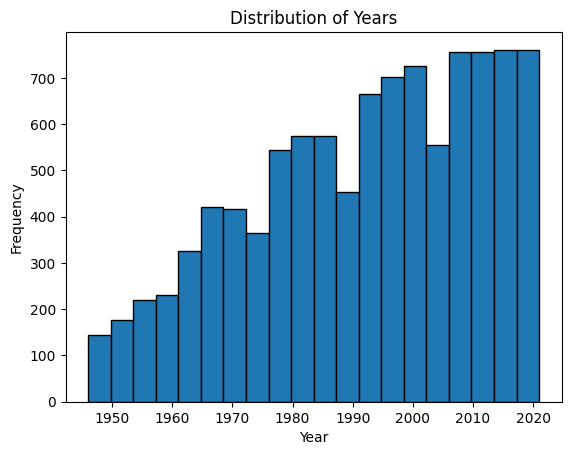

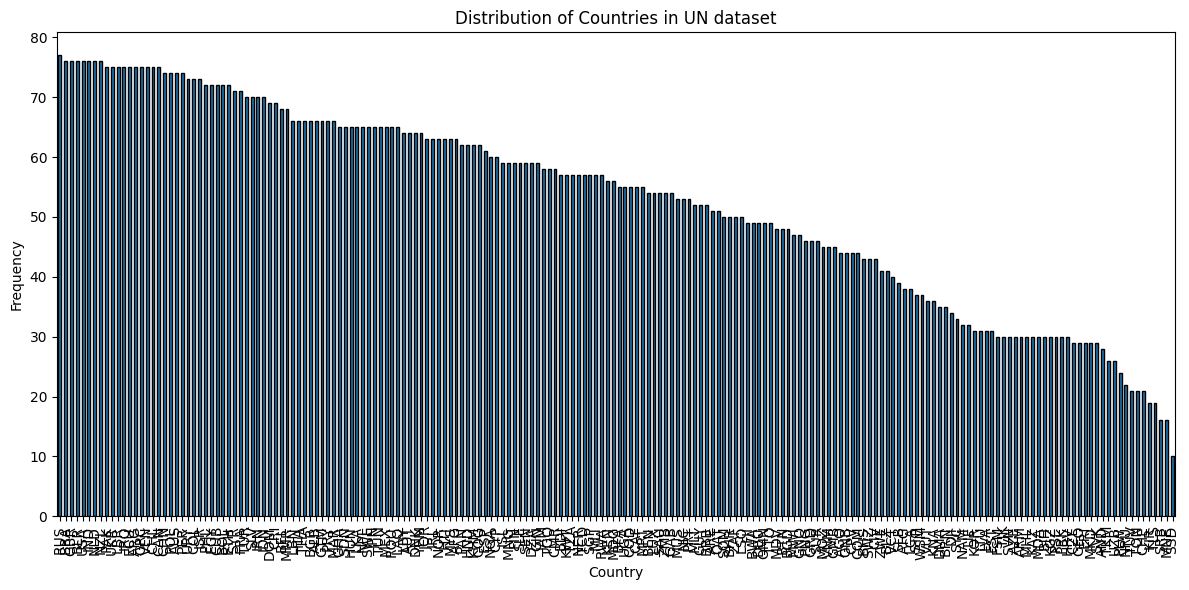

In [107]:
import pandas as pd
import matplotlib.pyplot as plt

plt.hist(df_sel['Year'], bins=20, edgecolor='k')  # You can adjust the number of bins as needed
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Distribution of Years')
plt.show()

country_counts = df_sel['ISO Code'].value_counts()

# Plot the distribution of countries as a bar chart
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
country_counts.plot(kind='bar', edgecolor='k')
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.title('Distribution of Countries in UN dataset')
plt.tight_layout()  # Ensures the labels fit properly
plt.show()

In [11]:
import statistics
country_counts = df_sel['ISO Code'].value_counts()
min_count = country_counts.min()
max_count = country_counts.max()
mean_count = round(country_counts.mean(),2)
median_count = country_counts.median()
mode_count = statistics.mode(country_counts)

# Print the calculated statistics
print("Descriptives about number of speeches per country")
print(f"Minimum Count: {min_count}")
print(f"Maximum Count: {max_count}")
print(f"Mean Count: {mean_count}")
print(f"Median Count: {median_count}")
print(f"Mode Count: {mode_count}")


Descriptives about number of speeches per country
Minimum Count: 10
Maximum Count: 77
Mean Count: 52.74
Median Count: 55.5
Mode Count: 30
